## Pipeline of Project

4. **Price Prediction**
 - Loading the datasets
 - Linear Regression
 - Neural Network 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler # Will be used for the normalization
from sklearn.utils import shuffle # Will be used for the shuffle of the data

# Using these for calling the different regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from math import sqrt

# Using tensorflow for the neural network 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

### Loading the datasets

In [2]:
# Loading the train and test datasets and take a quick look

train_set_DF = pd.read_csv('./Data/train_set_preprocessed.csv')
test_set_DF = pd.read_csv('./Data/test_set_preprocessed.csv')

train_set_DF.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365,5.010635
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355,5.420535
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365,5.017280
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194,4.499810
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0,4.394449


In [3]:
test_set_DF.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,214,40.72132,-73.95463,1,1,2,0.600000,5,90,5.690359
1,3,4,40.77606,-73.92804,1,2,0,1.373221,2,341,4.521789
2,2,94,40.81785,-73.93989,0,30,0,1.373221,1,0,4.007333
3,2,206,40.83658,-73.94088,0,7,2,0.330000,1,0,4.025352
4,2,202,40.80152,-73.96673,1,1,0,1.373221,1,0,4.709530


In [4]:
# Split features will be used for prediction(input X) and prices(output,prediction y) for the train_set and the test_set

X_train_DF = train_set_DF.drop(['price_log'], axis=1)
y_train_DF = pd.DataFrame(train_set_DF['price_log'])

X_test_DF = test_set_DF.drop(['price_log'], axis=1)
y_test_DF = pd.DataFrame(test_set_DF['price_log'])


Now, converting the DataFrame to a NumPy, then normalizing the data of X_train and of X_test with min-max scale. 
Then shuffling the data of X_train and Y_train will be applied in order to improve generalize capabilities

In [5]:
# Applying the MinMaxScaler for the normalization step
scaler = MinMaxScaler(feature_range=(-1, 1))

# Converting the DataFrame to a NumPy array
X_train = X_train_DF.to_numpy()
# Normalizing data
X_train = scaler.fit_transform(X_train)  
# Converting the DataFrame to a NumPy array changing the shape (transform from a column vector to a row vector)
y_train = y_train_DF.to_numpy().reshape(-1)
# Shuffling train dataset
X_train, y_train = shuffle(X_train, y_train) 

# Converting the DataFrame to a NumPy array
X_test = X_test_DF.to_numpy()
# Normalizing data
X_test = scaler.fit_transform(X_test)
# Converting the DataFrame to a NumPy array changing the shape (transform from a column vector to a row vector)
y_test = y_test_DF.to_numpy().reshape(-1)

# Printing the resulted shapes 
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (38482, 10)
y_train shape:  (38482,)
X_test shape:  (9621, 10)
y_test shape:  (9621,)


Just have a look of the values of X_train and y_train after normalization.

In [6]:
X_train

array([[-0.5       , -0.74545455, -0.04832823, ..., -0.99808887,
        -1.        , -1.        ],
       [ 0.        , -0.16363636,  0.16198408, ..., -0.98566651,
        -0.98773006, -1.        ],
       [ 0.        ,  0.61818182,  0.0809553 , ..., -0.86973517,
        -1.        , -0.9890411 ],
       ...,
       [-0.5       , -0.22727273, -0.16531537, ..., -0.86973517,
        -1.        , -1.        ],
       [-0.5       ,  0.65454545, -0.18765462, ..., -0.99904443,
        -1.        , -1.        ],
       [ 0.5       , -0.28181818,  0.0508267 , ..., -0.96177735,
        -0.98159509, -1.        ]])

In [7]:
y_train

array([3.71357207, 4.79579055, 6.68586095, ..., 4.4543473 , 5.1590553 ,
       4.09434456])

The prediction of the price will be accomplished with Linear Regression and then Neural Network

In this part, 3 metrics will be calculated for evaluating predictions.

Mean Absolute Error (MAE) is the distance between predictions and actual values.

Root Mean Square Error (RMSE) that is the root of MSE (Mean Square Error).
MSE is the distance between predictions and actual values.
It shows how accurately the model predicts the response.

R2 will be calculated to find the goodness of fit measure. 

## Price Prediction with Linear Regression

In [8]:
# Perform the Linear Regression

lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
# Fitting the model
lr.fit(X_train, y_train)
# Making the predictions after fitting the model
y_pred_1= lr.predict(X_test)


# Perform the Linear Regression with Lasso Model
lasso_model = Lasso() 
# Defining the parameters for grid search
parameters = {
'alpha': np.linspace(.0001, 100., 100), 
}
# Applying the GridSearch in order to find best hyperparameters in the given range
gs = GridSearchCV(lasso_model, parameters, cv=5)
# Fitting the model
gs.fit(X_train, y_train)
# Making the predictions after fitting the model
y_pred_2= gs.predict(X_test)


# Perform the Linear Regression with Ridge Model
ridge_model = Ridge() 
# Defining the parameters for grid search
parameters = {
'alpha': np.linspace(.0001, 100., 100), 
}
# Applying the GridSearch in order to find best hyperparameters in the given range
gs = GridSearchCV(ridge_model, parameters, cv=5)
# Fitting the model
gs.fit(X_train, y_train)
# Making the predictions after fitting the model
y_pred_3= gs.predict(X_test)


# Perform the Linear Regression with ElasticNet Model
elastic_model = ElasticNet()
# Defining the parameters for grid search
parameters = {
'alpha': np.linspace(.0001, 100., 100), 
'l1_ratio': np.linspace(.1, 1., 10)
}
# Applying the GridSearch in order to find best hyperparameters in the given range
gs = GridSearchCV(elastic_model, parameters, cv=5)
# Fitting the model
gs.fit(X_train, y_train)
# Making the predictions after fitting the model
y_pred_4= gs.predict(X_test)

In [9]:
# Printing the MAE, RMSE and R2-score metrics

print('-------------Linear Regression-----------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_1))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_1)))   
print('R2 %f' % r2_score(y_test, y_pred_1))

print('---------------Lasso-----------------------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_2))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_2)))   
print('R2 %f' % r2_score(y_test, y_pred_2))

print('---------------Ridge ---------------------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_3))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_3)))   
print('R2 %f' % r2_score(y_test, y_pred_3))

print('---------------ElasticNet-------------------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_4))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_4)))   
print('R2 %f' % r2_score(y_test, y_pred_4))

-------------Linear Regression-----------
MAE: 0.375534
RMSE: 0.499958
R2 0.524519
---------------Lasso-----------------------
MAE: 0.375252
RMSE: 0.499511
R2 0.525370
---------------Ridge ---------------------
MAE: 0.375507
RMSE: 0.499911
R2 0.524608
---------------ElasticNet-------------------
MAE: 0.375414
RMSE: 0.499754
R2 0.524908


## Price Prediction with NN

In [10]:
# Create a neural network model using Tensorflow 

# Defining the neural network model and their activation function 
# Using Dropout, which means that each single data point is used alone for a random subset of neurons. 
# Dropout is applied to make the neural network more robust and increase generalization capabilities.

model = tf.keras.Sequential([

    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dense(1)
])

# Defining the optimizer with the learning rate
opt=tf.keras.optimizers.Adam(learning_rate=0.05)
# Defining the RMSE for further usage as metric
rmse=tf.keras.metrics.RootMeanSquaredError()
# Compiling the model
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mae',rmse])

In [11]:
# Performing the training step 
history=model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=2,validation_split = 0.2)

Epoch 1/100
482/482 - 2s - loss: 0.5267 - mae: 0.4882 - root_mean_squared_error: 0.7257 - val_loss: 0.2053 - val_mae: 0.3356 - val_root_mean_squared_error: 0.4531
Epoch 2/100
482/482 - 2s - loss: 0.2128 - mae: 0.3446 - root_mean_squared_error: 0.4613 - val_loss: 0.2177 - val_mae: 0.3425 - val_root_mean_squared_error: 0.4666
Epoch 3/100
482/482 - 2s - loss: 0.2079 - mae: 0.3413 - root_mean_squared_error: 0.4559 - val_loss: 0.1919 - val_mae: 0.3287 - val_root_mean_squared_error: 0.4380
Epoch 4/100
482/482 - 2s - loss: 0.2123 - mae: 0.3451 - root_mean_squared_error: 0.4607 - val_loss: 0.2434 - val_mae: 0.3622 - val_root_mean_squared_error: 0.4934
Epoch 5/100
482/482 - 2s - loss: 0.2151 - mae: 0.3479 - root_mean_squared_error: 0.4638 - val_loss: 0.2544 - val_mae: 0.3961 - val_root_mean_squared_error: 0.5044
Epoch 6/100
482/482 - 2s - loss: 0.2164 - mae: 0.3490 - root_mean_squared_error: 0.4652 - val_loss: 0.2383 - val_mae: 0.3683 - val_root_mean_squared_error: 0.4882
Epoch 7/100
482/482 - 

482/482 - 2s - loss: 0.2376 - mae: 0.3671 - root_mean_squared_error: 0.4875 - val_loss: 0.2120 - val_mae: 0.3447 - val_root_mean_squared_error: 0.4604
Epoch 52/100
482/482 - 2s - loss: 0.2372 - mae: 0.3674 - root_mean_squared_error: 0.4870 - val_loss: 0.2161 - val_mae: 0.3545 - val_root_mean_squared_error: 0.4649
Epoch 53/100
482/482 - 2s - loss: 0.2382 - mae: 0.3674 - root_mean_squared_error: 0.4881 - val_loss: 0.2134 - val_mae: 0.3498 - val_root_mean_squared_error: 0.4619
Epoch 54/100
482/482 - 2s - loss: 0.2404 - mae: 0.3693 - root_mean_squared_error: 0.4903 - val_loss: 0.2211 - val_mae: 0.3607 - val_root_mean_squared_error: 0.4702
Epoch 55/100
482/482 - 2s - loss: 0.2423 - mae: 0.3711 - root_mean_squared_error: 0.4922 - val_loss: 0.2254 - val_mae: 0.3659 - val_root_mean_squared_error: 0.4747
Epoch 56/100
482/482 - 2s - loss: 0.2402 - mae: 0.3685 - root_mean_squared_error: 0.4901 - val_loss: 0.2114 - val_mae: 0.3464 - val_root_mean_squared_error: 0.4598
Epoch 57/100
482/482 - 2s - l

In [12]:
# The model.fit is returned "history" object that holds a record of the loss values and metric values during training
history_df=pd.DataFrame(history.history)
history_df.head(10)

,loss,mae,root_mean_squared_error,val_loss,val_mae,val_root_mean_squared_error
0,0.526663,0.488187,0.725715,0.205328,0.335617,0.453131
1,0.212758,0.344604,0.461257,0.217727,0.342454,0.466613
2,0.207887,0.341289,0.455946,0.191863,0.328709,0.438022
3,0.212250,0.345127,0.460706,0.243403,0.362151,0.493359
4,0.215067,0.347911,0.463754,0.254385,0.396145,0.504366
5,0.216379,0.348984,0.465165,0.238344,0.368292,0.488205
6,0.218351,0.351968,0.467280,0.200674,0.336063,0.447967
7,0.219558,0.352087,0.468570,0.248003,0.366293,0.497999
8,0.212533,0.344869,0.461013,0.198436,0.339278,0.445461
9,0.212966,0.346670,0.461483,0.191746,0.326288,0.437888


In [13]:
# Get all the statistics to print
train_loss = history_df['loss']
val_loss = history_df['val_loss']
train_mae = history_df['mae']
train_rmse = history_df['root_mean_squared_error']

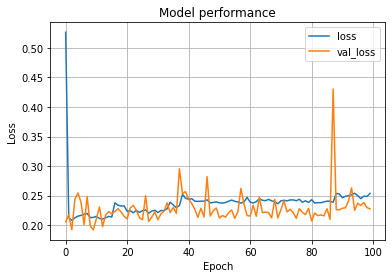

In [14]:
# Plot the training and validation loss related with number of epochs 
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model performance")
plt.grid(True)

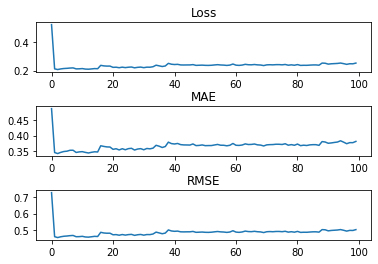

In [15]:
# Plot some statistics (Loss, MAE, RMSE) for training stage

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# wspace, hspace = 0.7 are the amounts of width and height reserved for space between subplots and adjustment is used to increase visualization of plots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.7)

ax1.set_title('Loss')
ax1.plot(train_loss)

ax2.set_title('MAE')
ax2.plot(train_mae)

ax3.set_title('RMSE')
ax3.plot(train_rmse)

In [16]:
# Make predictions with Neural Network and print out the MAE, RMSE, R2-score metrics

pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, pred)
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print('---------------NeuralNet-------------------')
print('MAE: %f'% mean_absolute_error(y_test, pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred)))   
print('R2: %f' % r2_score(y_test, pred))

---------------NeuralNet-------------------
MAE: 0.390719
RMSE: 0.514432
R2: 0.496590


In [17]:
# The overall summary of results of Linear Regression Models and Neural Network Model

print('-------------Linear Regression-----------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_1))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_1)))   
print('R2 %f' % r2_score(y_test, y_pred_1))

print('---------------Lasso-----------------------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_2))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_2)))   
print('R2 %f' % r2_score(y_test, y_pred_2))

print('---------------Ridge ---------------------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_3))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_3)))   
print('R2 %f' % r2_score(y_test, y_pred_3))

print('---------------ElasticNet-------------------')
print('MAE: %f'% mean_absolute_error(y_test, y_pred_4))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred_4)))   
print('R2 %f' % r2_score(y_test, y_pred_4))

print('---------------NeuralNet-------------------')
print('MAE: %f'% mean_absolute_error(y_test, pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred)))   
print('R2: %f' % r2_score(y_test, pred))

-------------Linear Regression-----------
MAE: 0.375534
RMSE: 0.499958
R2 0.524519
---------------Lasso-----------------------
MAE: 0.375252
RMSE: 0.499511
R2 0.525370
---------------Ridge ---------------------
MAE: 0.375507
RMSE: 0.499911
R2 0.524608
---------------ElasticNet-------------------
MAE: 0.375414
RMSE: 0.499754
R2 0.524908
---------------NeuralNet-------------------
MAE: 0.390719
RMSE: 0.514432
R2: 0.496590
